# **HEART** **FAILURE** **PREDICTION**
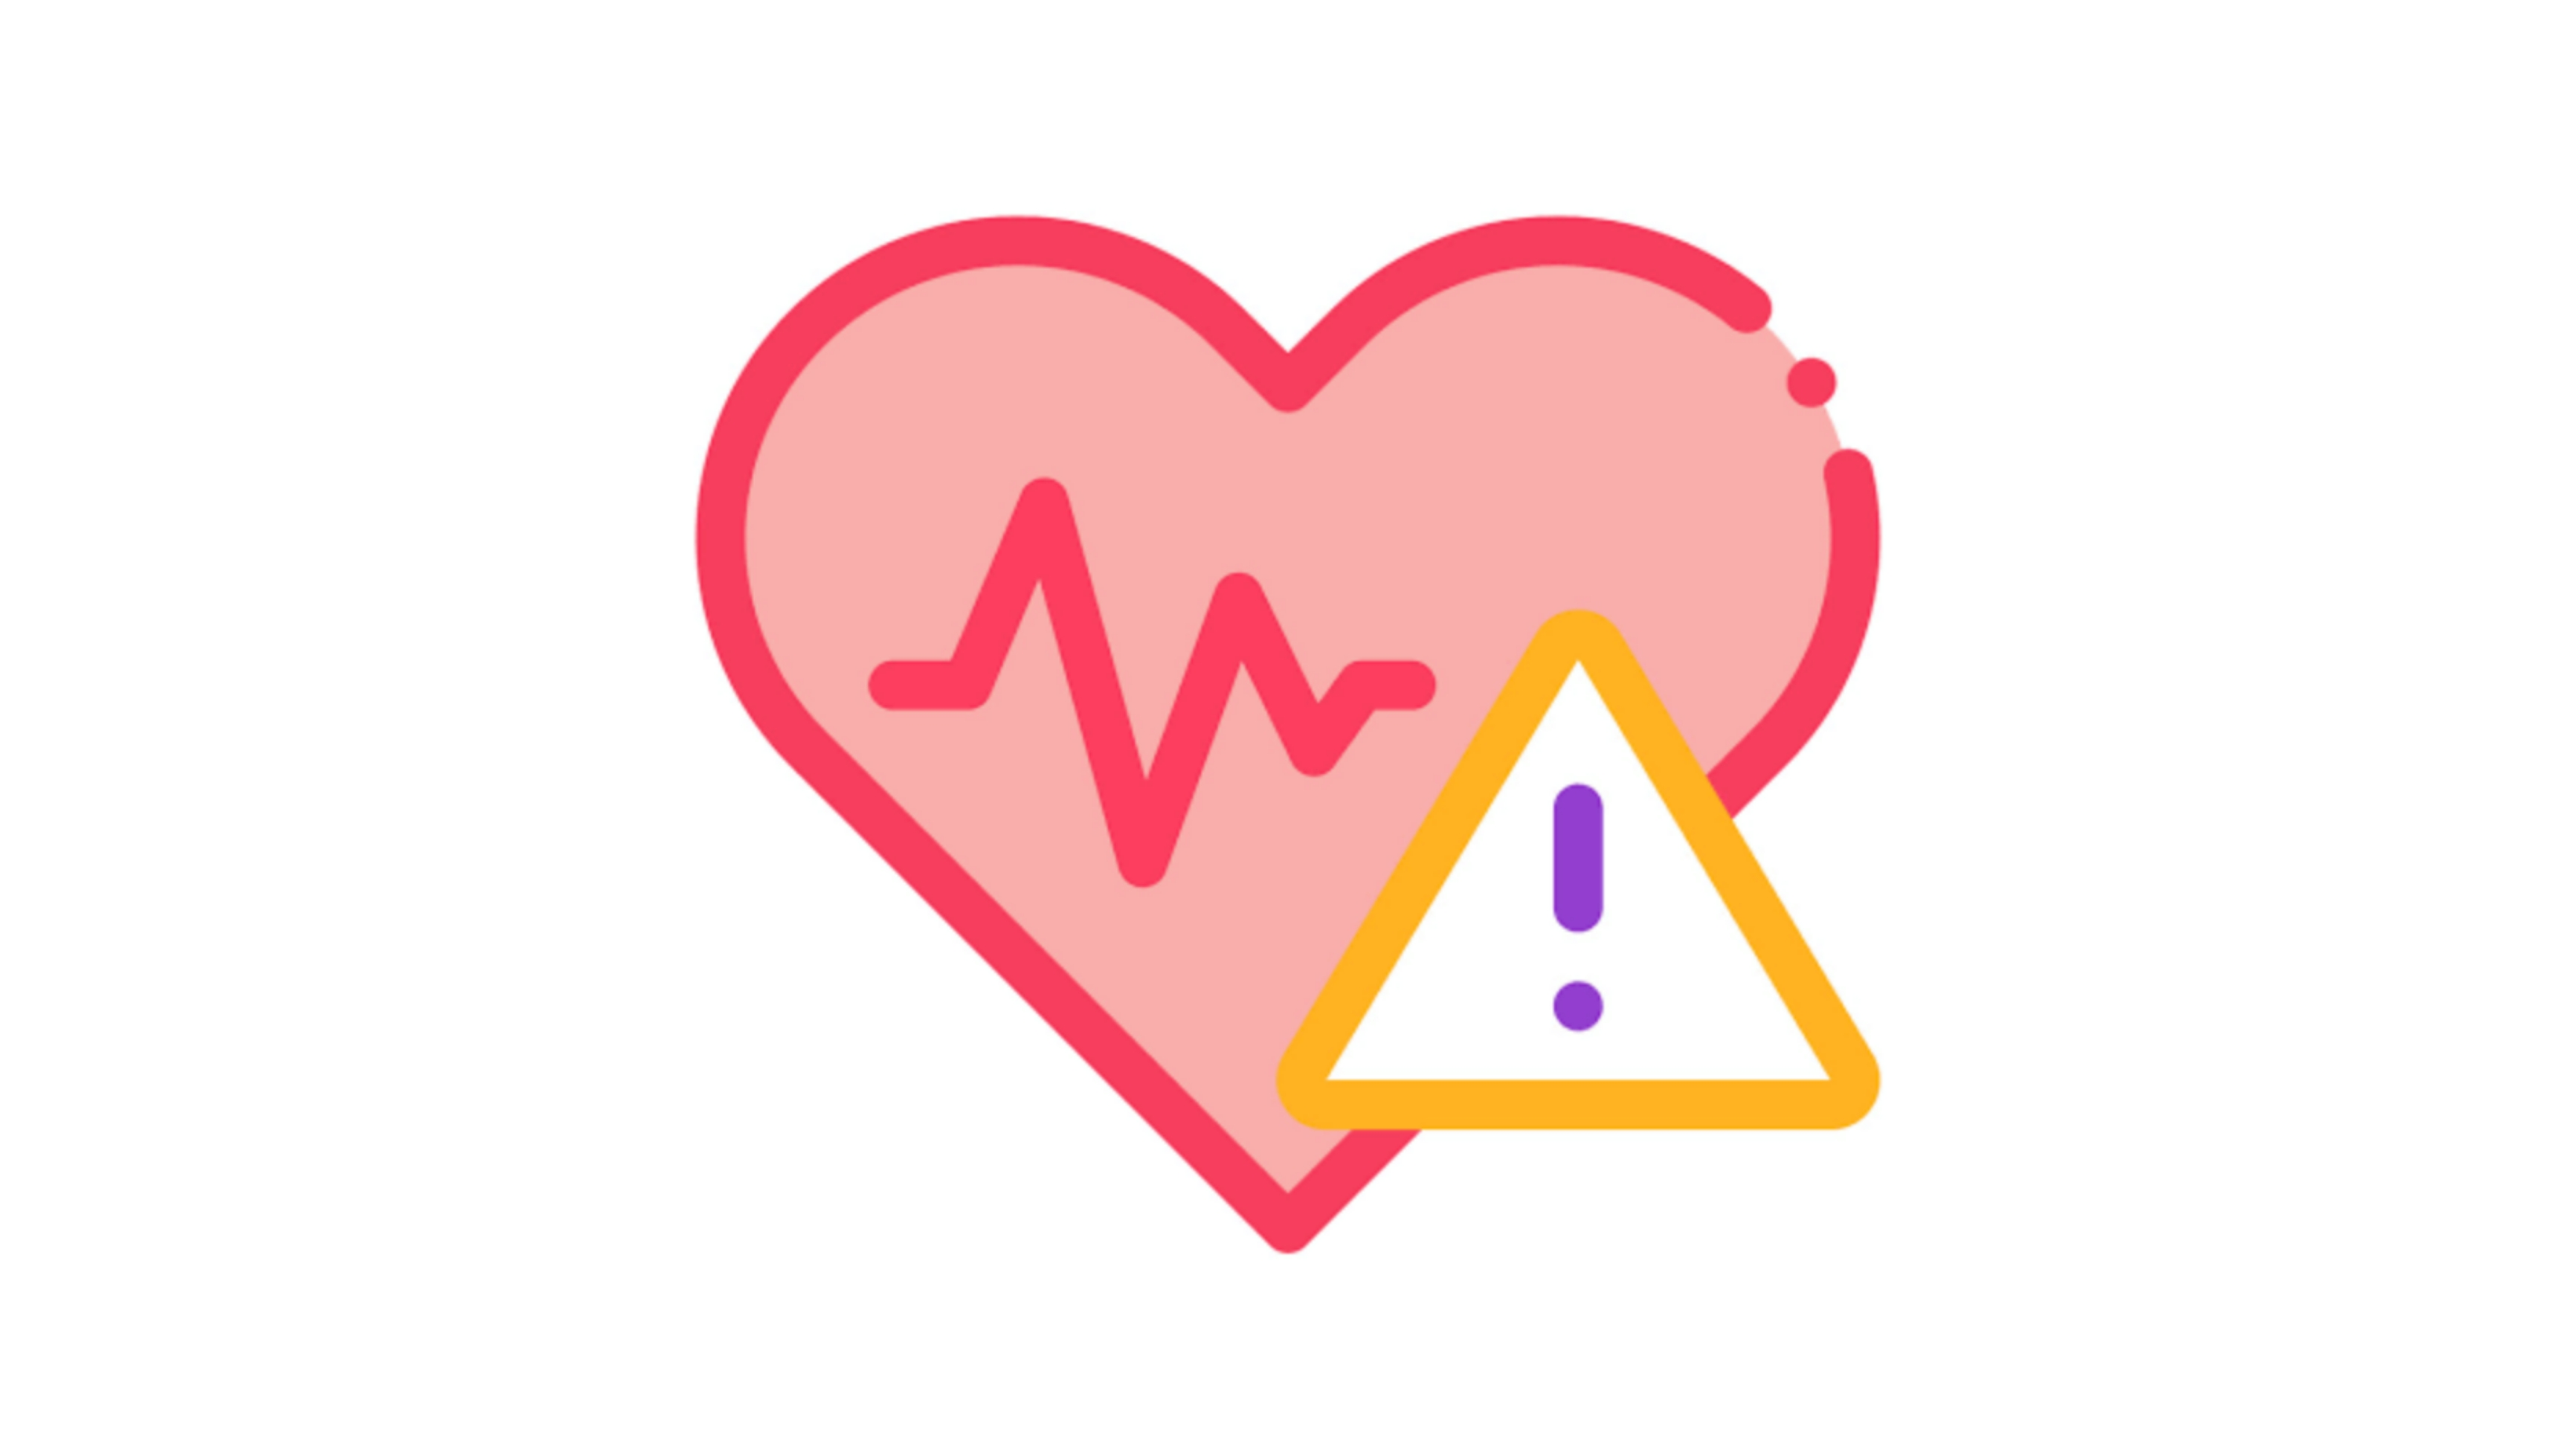

## PROBLEM STATEMENT

##### We would like to analyze risk factors for heart failure and model the probability of heart failure in an individual 
##### link to dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING THE DATA

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
np.shape(df)

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Understanding features:
Anemia - anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)

Creatine_phosphokinase (CPK) - CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

Ejection_fraction (EF) - EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.

Platelets - platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.
Serum_creatinine - The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.

Serum_sodium - Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).

Time - follow-up period (days)

High_blood_pressure - (True - 1, False - 0)

Age - between 40 - 95

Diabetes - (True - 1, False - 0)

Sex - (male - 1, female - 0)

Smoking - (True - 1, False - 0)

Death event - (True - 1, False - 0)

In [6]:
df.sex = df.sex.map({0:'F',1:'M'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,M,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,F,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,F,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,M,1,280,0


In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,M,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,F,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,F,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,M,1,280,0


### CHECKING FOR DUPLICATE OR MISSING VALUES

In [8]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [9]:
df.isnull().values.any()

False

In [10]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,M,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,F,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,F,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,M,1,280,0


### SOME DATA DISTRIBUTION PLOTS

<AxesSubplot:>

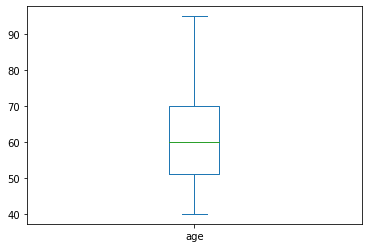

In [183]:
df['age'].plot.box()

<AxesSubplot:>

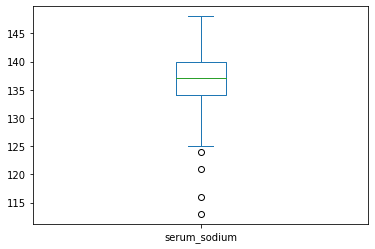

In [94]:
df["serum_sodium"].plot.box()

A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).

<AxesSubplot:>

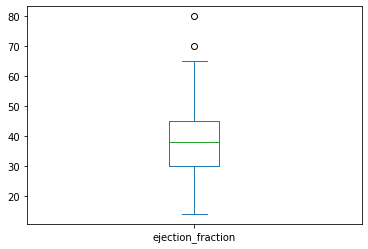

In [96]:
df["ejection_fraction"].plot.box()

A normal ejection fraction is about 50% to 75%, according to the American Heart Association.

<AxesSubplot:>

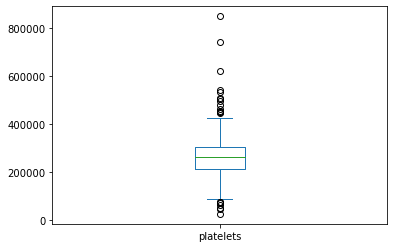

In [97]:
df["platelets"].plot.box()

The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.

<AxesSubplot:>

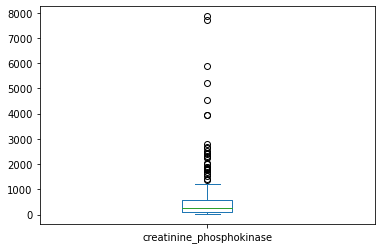

In [98]:
df["creatinine_phosphokinase"].plot.box()

CPK normal values: 10 to 120 micrograms per liter (mcg/L)

<AxesSubplot:>

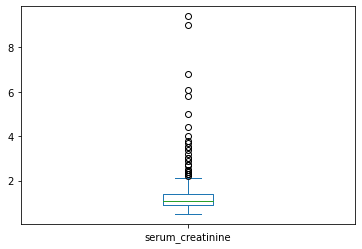

In [99]:
df["serum_creatinine"].plot.box()

the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.

## SOME RATIO PLOTS 


DIABETES RATIO

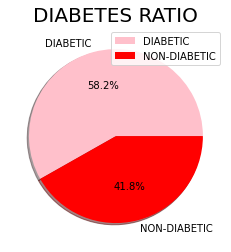

In [12]:
plt.pie(df['diabetes'].value_counts(),labels=['DIABETIC','NON-DIABETIC'],autopct='%1.1f%%',colors=['pink','red'],shadow=True)
plt.title('DIABETES RATIO',fontsize=20)
plt.legend()

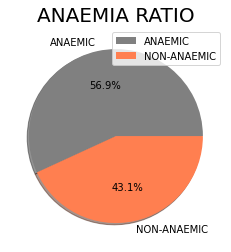

In [13]:
plt.pie(df['anaemia'].value_counts(),labels=['ANAEMIC','NON-ANAEMIC'],autopct='%1.1f%%',colors=['grey','coral'],shadow=True)
plt.title('ANAEMIA RATIO',fontsize=20)
plt.legend()

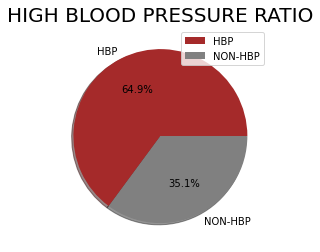

In [14]:
plt.pie(df['high_blood_pressure'].value_counts(),labels=['HBP','NON-HBP'],autopct='%1.1f%%',colors=['brown','grey'],shadow=True)
plt.title('HIGH BLOOD PRESSURE RATIO',fontsize=20)
plt.legend()

## QUERIES

##### 1. finding the average age at which patients get diagnosed with heart problems and how many exceptions are there .

In [15]:
avg_age = int(np.mean(df['age']))
avg_age

60

In [16]:
exc = df.value_counts(df.age[df['age']<avg_age]).sum()
exc

129

conclusion:there are 129 cases where the patients were younger than the average age of getting diagnosed with heart problems 

##### 2. finding the percentage of people having  heart problems who also smoked. 

In [17]:
smokers = df.value_counts(df.smoking[df['smoking']==1])
print(smokers)

smoking
1.0    96
dtype: int64


In [47]:
df.iloc[np.where(df.smoking==1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.0,1.3,129,M,1,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,M,1,8,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,M,1,10,1
9,80.0,1,123,0,35,1,388000.0,9.4,133,M,1,10,1
10,75.0,1,81,0,38,1,368000.0,4.0,131,M,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.0,1.0,140,M,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,M,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,M,1,270,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,M,1,280,0


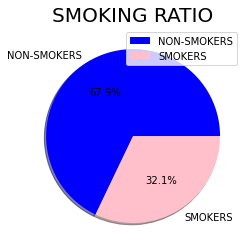

In [48]:
plt.pie(df['smoking'].value_counts(),labels=['NON-SMOKERS','SMOKERS'],colors=['blue','pink'],autopct='%1.1f%%',shadow=True)
plt.title('SMOKING RATIO',fontsize=20)
plt.legend()

CONCLUSION:smoking can not be considered a contributing event towards heart problems in patients

##### 3. is there a relation between heart problems and the gender of the patients.

In [20]:
print(df["sex"].value_counts())

M    194
F    105
Name: sex, dtype: int64


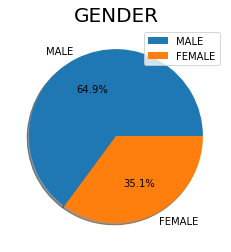

In [21]:
plt.pie(df['sex'].value_counts(),labels=['MALE','FEMALE'],autopct='%1.1f%%',shadow=True)
plt.title('GENDER',fontsize=20)
plt.legend()

CONCLUSION: There are more male patients than their female counterparts

##### 4.How many patients suffer from Hyponatremia?

Hyponatremia is a condition where sodium levels in your blood are lower than normal (less than 135 mmol/L). In many cases, too much water in your body dilutes sodium levels. It’s also possible to lose too much sodium. 

In [86]:
hyp = df.serum_sodium[df["serum_sodium"]<135].value_counts().sum()
hyp

83

In [82]:
df1=df[(df['serum_sodium']<135) & (df['DEATH_EVENT']==1)]
df1['DEATH_EVENT'].value_counts()

1    42
Name: DEATH_EVENT, dtype: int64

In [89]:
df1=df[(df['serum_sodium']<135)]

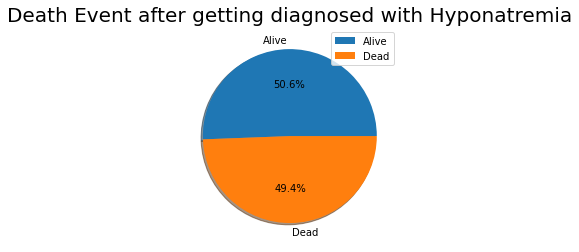

In [90]:
plt.pie(df1['DEATH_EVENT'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%',shadow=True)
plt.title('Death Event after getting diagnosed with Hyponatremia',fontsize=20)
plt.legend()

CONCLUSION: Almost half of those who are diagnosed with Hyponatermia could not survive. 
Which tells us that Hyponetrimia could be an important contributing factor to fatal heart problems

##### 5.How many patients suffer from Thrombocythemia/thrombocytosis.

CONTEXT:
Thrombocythemia occurs when faulty cells in your bone marrow make too many platelets.

Thrombocytosis occurs when another disease or condition causes you to have a high platelet count.(>450,000)

In [100]:
thr = df.platelets[df["platelets"]>450000].value_counts().sum()
thr

13

To find if the platelets level are because of thrombocytosis or not lets find out if these patiens also have any other disorders which may cause high platelets count

<AxesSubplot:ylabel='Density'>

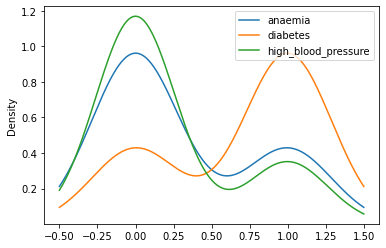

In [138]:
new_df = df[df['platelets']>450000]
highPlatelet_Index = new_df.iloc[:,[1,3,5]]
highPlatelet_Index.plot.kde()

##### 6.Severe thrombocytopenia can cause bleeding into the brain, which can be fatal,lets see if thats the case in our observations.

<AxesSubplot:ylabel='Density'>

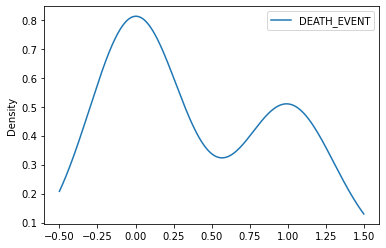

In [144]:
highPlatelet_Index = new_df.iloc[:,[12]]
highPlatelet_Index.plot.kde()

CONCLUSION: from this we can conclude most contributing disorder is diabetes and least contributing factor is anaemia 

Also in our case thrombocytopenia is not that fatal

##### 7.Do many of the patients suffer from hypertrophic cardiomyopathy or have low ejection fraction?

CONTEXT:hypertrophic cardiomyopathy, a common cause of sudden cardiac arrest.this disorder can be caused because of high ejection fraction.

As we concluded from our box plot many of the patients in our dataset have ejection fraction much higher than the mean of the total dataset.

if not lets see if our dataset patients suffer from low ejection fraction 

(40-55% : indicates previous heart damage or failure)

(<40% : May confirm the diagnosis of heart failure)

The number of people out of 299 who have ejection fraction less than lower limit: 182


<AxesSubplot:ylabel='Frequency'>

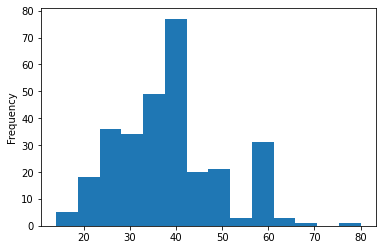

In [195]:
print("The number of people out of 299 who have ejection fraction less than lower limit:",df.ejection_fraction[df['ejection_fraction']<40].value_counts().sum())

df.ejection_fraction.plot.hist(bins=14)

##### 8.Lets see if more men or women suffer from low ejection fraction

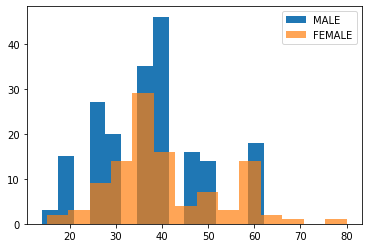

In [182]:
male = df[df['sex']=='M']
female = df[df['sex']=='F']
plt.hist(male['ejection_fraction'],label='MALE',bins=14)
plt.hist(female['ejection_fraction'],alpha=0.7, label='FEMALE',bins=14)
plt.legend(loc='upper right')
plt.show()

CONCLUSION:We see most of the patients in our dataset have ejection fraction less than 40% which means they are at a high risk of heart failure.

Also more men at are at a risk of heart failure as they are larger in number among the patients who have ejection fraction less than 40%

##### 9.Do people who smoke have weaker heart muscles?

According to Centers for Disease Control and Prevention smoking causes the muscles of aorta and serum creatinine and creatinine phosphokinase are enzymes which indicate damage to muscles so lets see if smoking has any relation to any abnormalities in these two

<AxesSubplot:>

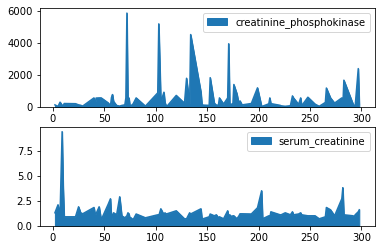

In [231]:
new_df = df.iloc[np.where(df['smoking']==1)]
new_df1=new_df.iloc[:,[2]]
new_df2=new_df.iloc[:,[7]]
fig, axes = plt.subplots(nrows=2, ncols=1)
new_df1.plot.area(ax=axes[0])
new_df2.plot.area(ax=axes[1])

CONCLUSION:This tells that most smokers do have a greatwer chance of having weaker aorta msucles,and hence more chances of a heart failure

##### 10. But do the two characterstics indicating heart muscles health are related to each other?

In [232]:
df['serum_creatinine'].corr(df['creatinine_phosphokinase'])

-0.016408479546217356

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='serum_creatinine'>

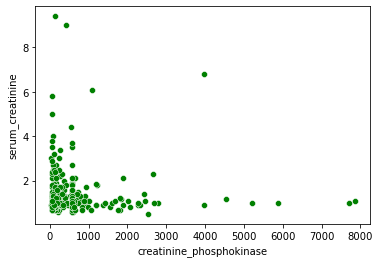

In [187]:
sns.scatterplot(x='creatinine_phosphokinase',y='serum_creatinine',data=df,color='green')

CONCLUSION: These two attributes have a negative correlation .i.e. when serum creatinine increases creatinine phosphokinase decreases by a very small degree.

such small differene can be ignored and this claim is supoorted by scatterplot as it shows no major negative correlation.

### SOME MORE MISCELLANEOUS QUERIES

##### Distribution of Death by heart failure in dataset

In [22]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

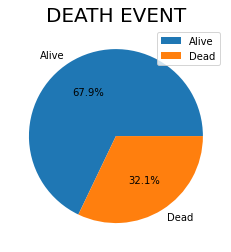

In [23]:
plt.pie(df['DEATH_EVENT'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%')
plt.title('DEATH EVENT',fontsize=20)
plt.legend()

<AxesSubplot:xlabel='serum_sodium', ylabel='creatinine_phosphokinase'>

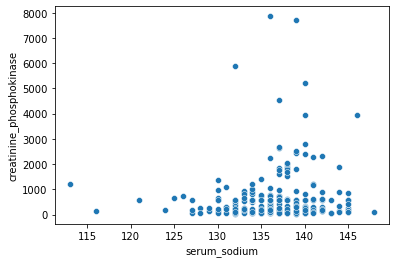

In [37]:
sns.scatterplot(x=df['serum_sodium'],y=df['creatinine_phosphokinase'])

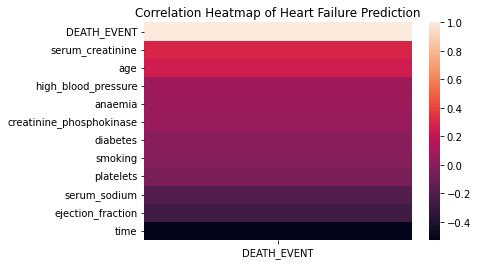

In [52]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False))
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!THE END!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!